In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [336]:
%config Completer.use_jedi = False

In [343]:
def get_fitness_df(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_time_df(df):
    fitness_col = [col for col in df if col.startswith('time')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_fevals_df(df):
    fitness_col = [col for col in df if col.startswith('fevals')]
    df_fitness = df[fitness_col]
    return df_fitness

def plot_fitness(df_fitness, names={}, title="", save_as=None):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fitness_" + name], label=label)
        
    plt.legend()
    plt.grid()
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()

def plot_time(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Time") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["time_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_fevals(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Function Evals") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fevals_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def combine_csv(problem, names={}):
    # read first file so we can get indexes
    _first_file_name = list(names.keys())[0]
    df_read = pd.read_csv("ABAGAIL/jython/data/" + problem + "/"+ _first_file_name +".csv")
    df = pd.DataFrame(index = df_read["iters"])
    
    for name in names.keys():
        df_read = pd.read_csv("ABAGAIL/jython/data/"+ problem + "/" + name +".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + name)

        df = df.join(df_read)
        
    df.ffill(inplace= True)
    return df

In [333]:
def plot_max_fitness_bar(combined_df, names, title="", save_as=None):
    plt.title(title)
    plt.ylabel("Fitness Score")
    plt.ylabel("Algorithm") 
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_fitness_value = row["fitness_" + name]
        
        x_labels.append(label)
        y_values.append(max_fitness_value)
        
        print(label, max_fitness_value)
        

    plt.bar(x_labels, y_values)
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()

In [334]:
def plot_max_time_bar(combined_df, names, title="", save_as=None):
    plt.title(title)
    plt.ylabel("Time (Seconds)")
    plt.ylabel("Algorithm") 
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_time_value = row["time_" + name]
        
        x_labels.append(label)
        y_values.append(max_time_value)
        
        print(label, max_time_value)
        
    bars = plt.bar(x_labels, y_values)
    
    # Set bar color
    for bar in bars:
        bar.set_color('green')

    if save_as:
        plt.savefig('images/'+save_as)
        
    plt.show()

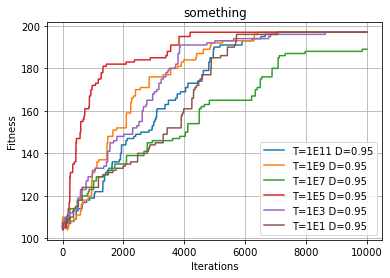

In [323]:
files = {
    "exp00-SA-T=1E11_D=0.95"    : "T=1E11 D=0.95",
    "exp00-SA-T=1E9_D=0.95"    : "T=1E9 D=0.95",
    "exp00-SA-T=1E7_D=0.95"    : "T=1E7 D=0.95",
    "exp00-SA-T=1E5_D=0.95"    : "T=1E5 D=0.95",
    "exp00-SA-T=1E3_D=0.95"    : "T=1E3 D=0.95",
    "exp00-SA-T=1E1_D=0.95"    : "T=1E1 D=0.95",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="something")

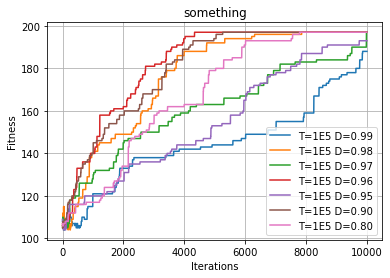

In [324]:
files = {
    "exp01-SA-T=1E5_D=0.99"    : "T=1E5 D=0.99",
    "exp01-SA-T=1E5_D=0.98"    : "T=1E5 D=0.98",
    "exp01-SA-T=1E5_D=0.97"    : "T=1E5 D=0.97",
    "exp01-SA-T=1E5_D=0.96"    : "T=1E5 D=0.96",
    "exp01-SA-T=1E5_D=0.95"    : "T=1E5 D=0.95",
    "exp01-SA-T=1E5_D=0.90"    : "T=1E5 D=0.90",
    "exp01-SA-T=1E5_D=0.80"    : "T=1E5 D=0.80",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="something")

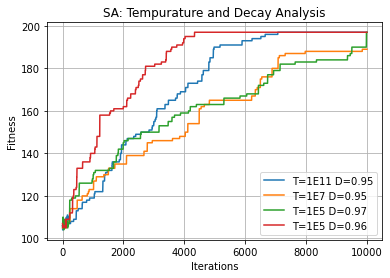

In [344]:
files = {
    "exp00-SA-T=1E11_D=0.95"   : "T=1E11 D=0.95",
#     "exp00-SA-T=1E9_D=0.95"    : "T=1E9 D=0.95",
    "exp00-SA-T=1E7_D=0.95"    : "T=1E7 D=0.95",
#     "exp00-SA-T=1E5_D=0.95"    : "T=1E5 D=0.95",
#     "exp00-SA-T=1E3_D=0.95"    : "T=1E3 D=0.95",
#     "exp00-SA-T=1E1_D=0.95"    : "T=1E1 D=0.95",
    
#     "exp01-SA-T=1E5_D=0.99"    : "T=1E5 D=0.99",
#     "exp01-SA-T=1E5_D=0.98"    : "T=1E5 D=0.98",
    "exp01-SA-T=1E5_D=0.97"    : "T=1E5 D=0.97",
    "exp01-SA-T=1E5_D=0.96"    : "T=1E5 D=0.96",
#     "exp01-SA-T=1E5_D=0.95"    : "T=1E5 D=0.95",
#     "exp01-SA-T=1E5_D=0.90"    : "T=1E5 D=0.90",
#     "exp01-SA-T=1E5_D=0.80"    : "T=1E5 D=0.80",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="SA: Tempurature and Decay Analysis", save_as="cpp_01.png")

In [267]:
# T=E5 D=0.96

# N=100 (Default)

In [346]:
files = {
    "exp03-RHC-default"   : "RHC",
    "exp03-GA-default"    : "GA",
    "exp03-MIMIC-default" : "MIMIC",
    "exp03-SA-default"    : "SA",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)
fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

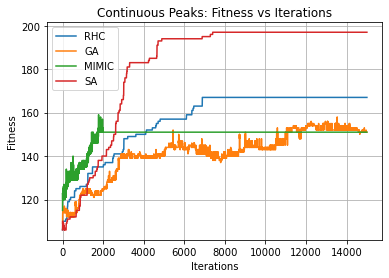

In [347]:
plot_fitness(ft_df[:15000], files, "Continuous Peaks: Fitness vs Iterations", save_as="N100.png")

RHC 167.0
GA 158.0
MIMIC 159.0
SA 197.0


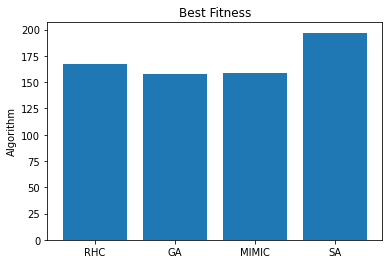

In [348]:
plot_max_fitness_bar(df_test[:15000], files, title="Best Fitness", save_as="N100 Best fitness.png")

RHC 0.34800004959106445
GA 1.186000108718872
MIMIC 13.223000049591064
SA 0.21499991416931152


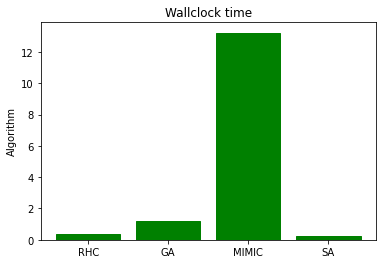

In [349]:
plot_max_time_bar(df_test[:15000], files, title="Wallclock time", save_as="N100 time.png")

# N=50

In [355]:
files = {
    "exp04-RHC-N=50"   : "RHC",
    "exp04-GA-N=50"    : "GA",
    "exp04-MIMIC-N=50" : "MIMIC",
    "exp04-SA-N=50"    : "SA",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)
fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

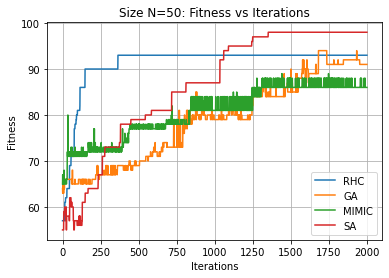

In [359]:
plot_fitness(ft_df[:2000], files, "Size N=50: Fitness vs Iterations", save_as="N50.png")

RHC 93.0
GA 94.0
MIMIC 89.0
SA 98.0


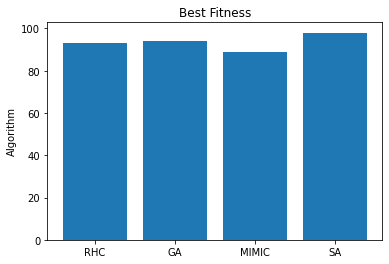

In [357]:
plot_max_fitness_bar(df_test[:2000], files, title="Best Fitness")

RHC 0.060999870300292976
GA 0.31299996376037603
MIMIC 3.5550000667572017
SA 0.03699994087219238


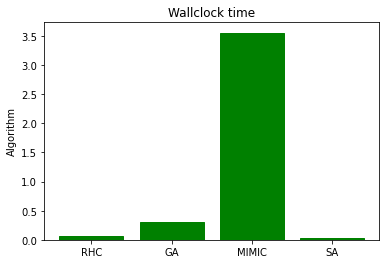

In [360]:
plot_max_time_bar(df_test[:2000], files, title="Wallclock time")

# N=200

In [361]:
files = {
    "exp05-RHC-N=200"   : "RHC",
    "exp05-GA-N=200"    : "GA",
    "exp05-MIMIC-N=200" : "MIMIC",
    "exp05-SA-N=200"    : "SA",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)
fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

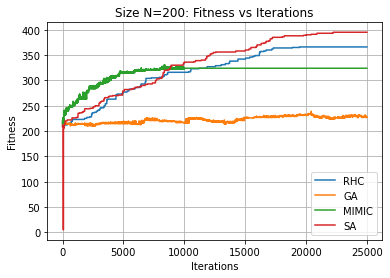

In [362]:
plot_fitness(ft_df[:25000], files, "Size N=200: Fitness vs Iterations", save_as="N200.png")

RHC 366.0
GA 239.0
MIMIC 331.0
SA 395.0


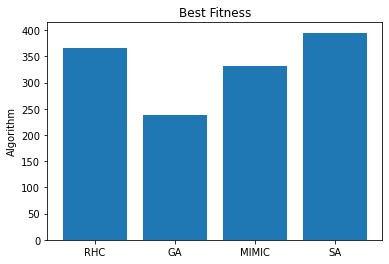

In [363]:
plot_max_fitness_bar(df_test[:25000], files, title="Best Fitness")

RHC 0.7839999198913574
GA 3.588000059127808
MIMIC 196.96900010108948
SA 0.7070000171661377


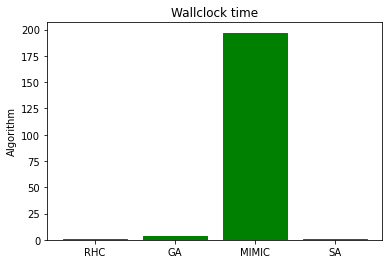

In [364]:
plot_max_time_bar(df_test[:25000], files, title="Wallclock time") 